In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


## Get the data

In [2]:
proteomics = CPTAC.get_proteomics()
transcriptomics = CPTAC.get_transcriptomics()

#### Print the protemoics and transcriptomics data

In [3]:
print(proteomics)

idx     A1BG     A2M    A2ML1  A4GALT      AAAS    AACS    AADAT    AAED1  \
S001 -1.1800 -0.8630 -0.80200  0.2220  0.256000  0.6650  1.28000 -0.33900   
S002 -0.6850 -1.0700 -0.68400  0.9840  0.135000  0.3340  1.30000  0.13900   
S003 -0.5280 -1.3200  0.43500     NaN -0.240000  1.0400 -0.02130 -0.04790   
S004  2.3500  2.8200 -1.47000     NaN  0.154000  0.0332  0.51300  0.67400   
S005 -1.6700 -1.1900 -0.44300  0.2430 -0.099300  0.7570  0.74000 -0.92900   
S006 -0.3740 -0.0206 -0.53700  0.3110  0.375000  0.0131 -1.10000      NaN   
S007 -1.0800 -0.7080 -0.12600 -0.4260 -0.114000 -0.1110  0.89500  1.26000   
S008 -1.3200 -0.7080 -0.80800 -0.0709  0.138000  0.6560 -0.28000 -0.12800   
S009 -0.4670  0.3700 -0.33900     NaN  0.434000  0.0358 -0.17500  0.18100   
S010 -1.1200 -1.3100  0.91200  0.4180 -0.076800  0.8460 -0.12100      NaN   
S011 -0.7160 -0.8850  2.82000 -0.3430  0.147000  0.4450 -0.05650 -0.83800   
S012 -0.2320 -0.0910  0.61800  1.6300 -0.250000  1.3300 -1.72000 -0.88900   

In [4]:
print(transcriptomics)

idx   A1BG  A1BG-AS1  A1CF    A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  A4GALT  \
S001  4.02      2.16  3.27  13.39     5.88   6.79   1.55     0.97   10.34   
S002  4.81      2.21  4.86  13.24     5.93   6.33   0.93     0.00   10.83   
S003  6.24      6.43  3.68  14.32     6.53   9.42   2.79     0.00   10.98   
S005  5.31      4.87  5.59  13.77     6.35   4.22   2.97     0.00    8.68   
S006  9.84      8.83  7.00  13.12     6.49   6.83   1.80     0.00   11.42   
S007  5.03      5.59  4.82  14.13     7.65   7.75   1.59     1.01    9.61   
S008  3.17      3.56  3.98  13.49     6.48   5.88   2.23     1.16    9.71   
S009  6.03      5.46  7.21  13.67     6.95   6.69   2.93     0.00    8.78   
S010  6.02      5.90  7.73  14.30     7.76   8.47   3.47     1.18    9.98   
S011  5.71      5.43  4.20  14.97     6.87   9.96   2.83     0.00   10.22   
S012  5.17      4.89  4.37  13.40     5.69   8.69   1.98     2.79   11.42   
S013  5.99      5.35  5.54  13.47     5.97   4.74   2.80     0.99   10.46   

#### Merge the data frames

In [5]:
A1BG_cross = CPTAC.compare_gene(proteomics, transcriptomics, 'A1BG')

### print the merged data frame

In [6]:
print(A1BG_cross)

      proteomics  transcriptomics_linear
S001     -1.1800                    4.02
S002     -0.6850                    4.81
S003     -0.5280                    6.24
S005     -1.6700                    5.31
S006     -0.3740                    9.84
S007     -1.0800                    5.03
S008     -1.3200                    3.17
S009     -0.4670                    6.03
S010     -1.1200                    6.02
S011     -0.7160                    5.71
S012     -0.2320                    5.17
S013      1.2600                    5.99
S014     -0.2690                    5.38
S015     -0.2570                    5.95
S016     -0.7820                    5.86
S017     -1.3400                    3.27
S018     -0.9240                    4.65
S019      0.1500                    4.33
S020      0.1810                    4.58
S021     -0.5930                    4.60
S022     -0.9580                    4.90
S023     -0.4540                    4.03
S024     -0.2400                    4.62
S025     -0.8310

### Plot data

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


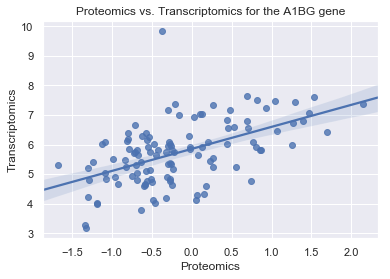

In [8]:
sns.set(style="darkgrid")
plot = sns.regplot(x="proteomics", y="transcriptomics_linear", data=A1BG_cross)
plot.set(xlabel='Proteomics', ylabel='Transcriptomics', title='Proteomics vs. Transcriptomics for the A1BG gene')
plt.show()